In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
train = pd.read_csv("/content/fraudTrain.csv")
test = pd.read_csv("/content/fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.578537e+06,1.578537e+06,1.578537e+06,1.578537e+06,1.578537e+06,1.578536e+06,1.578536e+06,1.578536e+06,1.578536e+06,1.578536e+06,1.578536e+06
mean,4.291881e+05,4.174107e+17,6.994614e+01,4.881911e+04,3.853674e+01,-9.022957e+01,8.876007e+04,1.357213e+09,3.853655e+01,-9.022979e+01,5.075589e-03
std,2.792683e+05,1.309201e+18,1.585514e+02,2.688393e+04,5.071792e+00,1.374753e+01,3.017132e+05,1.930305e+07,5.106122e+00,1.375952e+01,7.106216e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.973170e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.430000e+02,1.340985e+09,3.473915e+01,-9.690222e+01,0.000000e+00
50%,3.946340e+05,3.520550e+15,4.739000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.354398e+09,3.936784e+01,-8.744316e+01,0.000000e+00
75%,6.281830e+05,4.642255e+15,8.302000e+01,7.204200e+04,4.189480e+01,-8.015800e+01,2.032800e+04,1.376695e+09,4.195501e+01,-8.024328e+01,0.000000e+00
max,1.022817e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [3]:
print(train.shape)
print(test.shape)

(1022818, 23)
(555719, 23)


In [4]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.578537e+06  1.578537e+06  1.578537e+06  1.578537e+06  1.578537e+06   
mean   4.291881e+05  4.174107e+17  6.994614e+01  4.881911e+04  3.853674e+01   
std    2.792683e+05  1.309201e+18  1.585514e+02  2.688393e+04  5.071792e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    1.973170e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    3.946340e+05  3.520550e+15  4.739000e+01  4.817400e+04  3.935430e+01   
75%    6.281830e+05  4.642255e+15  8.302000e+01  7.204200e+04  4.189480e+01   
max    1.022817e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.578536e+06  1.578536e+06  1.578536e+06  1.578536e+06  1.578536e+06   
mean  -9.022957e+01  8.876007e+04  1.357213e+09  3.853655e+01 -9.022979e+01   
std    1.374753e+01  3.017132e+05  1.930305e+07  5.

In [5]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [7]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [8]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [9]:
print(train.shape)
print(test.shape)
print(data.shape)

(1022818, 23)
(555719, 23)
(1578537, 23)


In [10]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

     zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252  42.1808 -112

ValueError: cannot reindex on an axis with duplicate labels

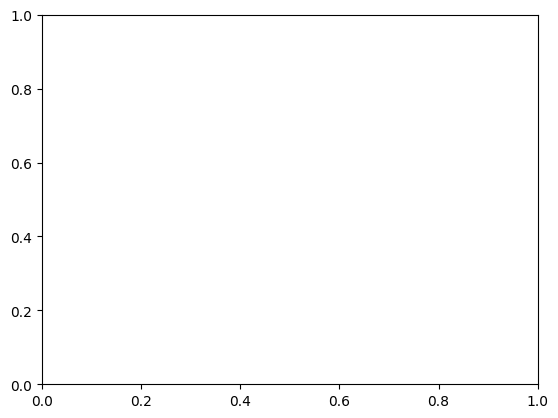

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [12]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

555719
0


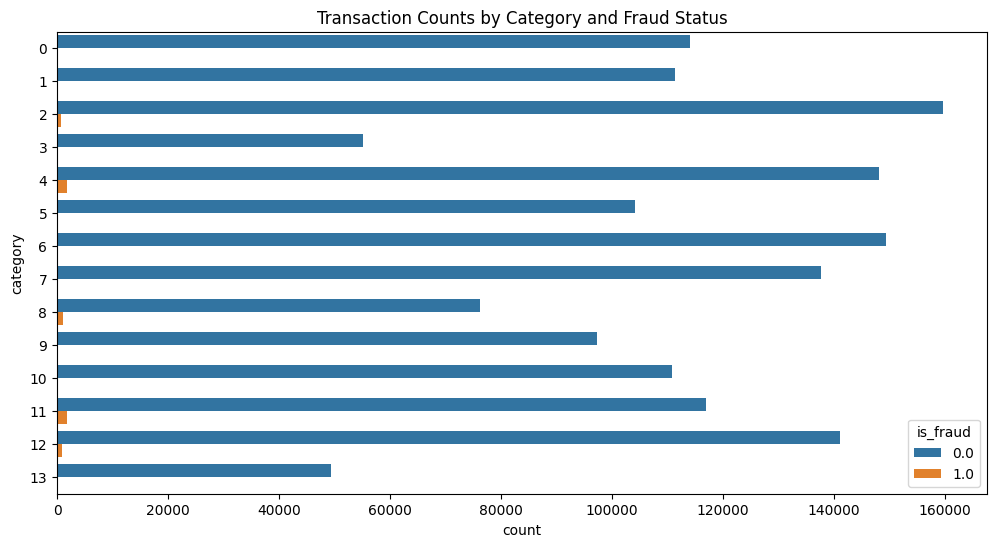

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

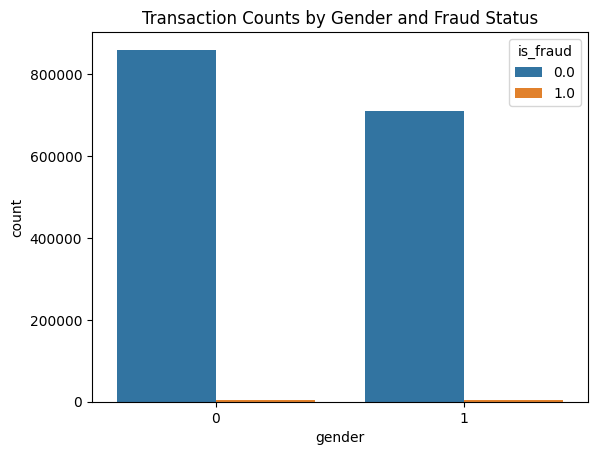

In [15]:
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

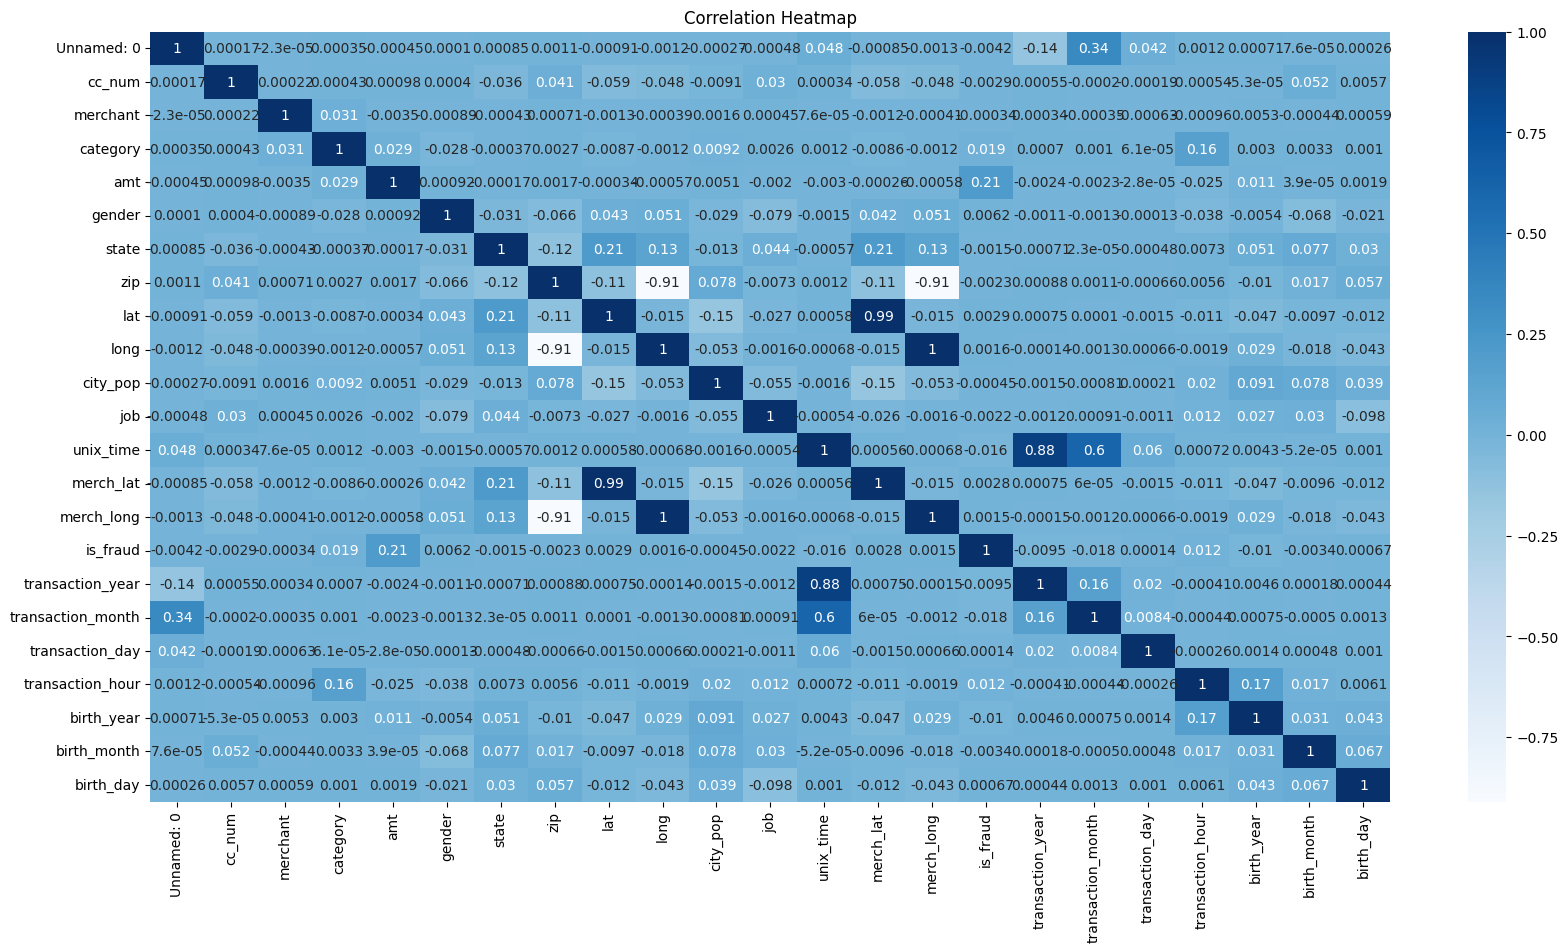

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [17]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

ValueError: Input y contains NaN.

In [20]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values